In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
ss = StandardScaler()

df = pd.read_csv('C:/Users/Palla Anuraag Sharma/Downloads/Datacamp/Datasets/Iris DataSet/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
x = ss.fit_transform(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
y = le.fit_transform(df['Species'])

## Principal Component Analysis

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,random_state=23)
x_pca = pca.fit_transform(x)
x_pca_label = np.concatenate((x_pca, y.reshape(x.shape[0], 1)), axis=1)
print(x_pca_label[:5,:])

[[-2.26454173  0.5057039   0.        ]
 [-2.0864255  -0.65540473  0.        ]
 [-2.36795045 -0.31847731  0.        ]
 [-2.30419716 -0.57536771  0.        ]
 [-2.38877749  0.6747674   0.        ]]


## K-means Clustering

In [5]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 3,n_init=25,random_state=23)
k_means.fit(x)
y_cluster = k_means.predict(x)

In [6]:
from collections import Counter 
cnt = Counter(y_cluster)

# Display some basic results of the clustering
print('Cluster count.')
print(30*'-')
for itm in cnt:
    print(f'Cluster {itm}     : {cnt[itm]:>4d} members')

Cluster count.
------------------------------
Cluster 1     :   50 members
Cluster 2     :   47 members
Cluster 0     :   53 members


In [7]:
cluster_centers = k_means.cluster_centers_
cc_pca = pca.transform(cluster_centers)

# Display cluster centers
for idx, xy_c in enumerate(cc_pca):
    print(f'Cluster {idx} center located at ({xy_c[0]:4.2f}, {xy_c[1]:4.2f})')

Cluster 0 center located at (0.57, -0.81)
Cluster 1 center located at (-2.22, 0.29)
Cluster 2 center located at (1.72, 0.60)


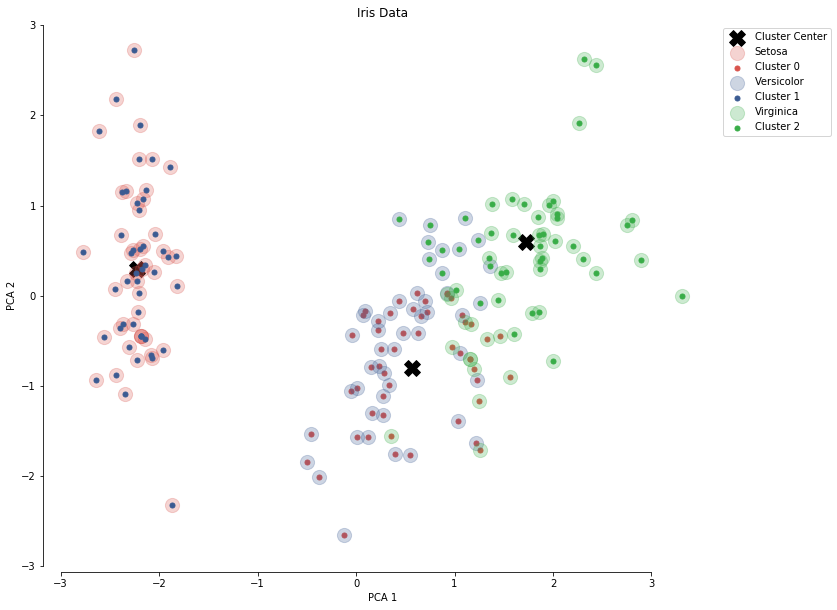

In [8]:
cols = ['PCA1', 'PCA2', 'Species']
dt = pd.DataFrame(x_pca_label, columns = cols)

# Reduced Features with predicted clusters
pc = pd.DataFrame(np.concatenate((x_pca, y_cluster.reshape(x.shape[0], 1)), axis=1), columns = cols)

# Two sets of colors, can modify these to ensure colors match 
# between known and predicted clusters.
# colors for true classes
clr = [sns.xkcd_rgb['pale red'], 
       sns.xkcd_rgb['denim blue'], 
       sns.xkcd_rgb['medium green']]

# colors for predicted clusters
pclr = [sns.xkcd_rgb['pale red'], 
        sns.xkcd_rgb['denim blue'],
        sns.xkcd_rgb['medium green']]

# Label data
lbls = ['Setosa', 'Versicolor', 'Virginica']
plbls = ['Cluster 0', 'Cluster 1', 'Cluster 2']


# Predicted Clusters

# Now make the plot
fig, ax = plt.subplots(figsize=(12, 10))

# Plot cluster centers
ax.scatter(cc_pca[:,0], cc_pca[:,1], 
           s=250, c='k', marker='X', 
           label='Cluster Center')

# Plot each species separately
for idx in range(3):
    
    # Plot species(real classes) as large points
    tmp_df = dt[dt['Species'] == idx]
    ax.scatter(tmp_df['PCA1'], tmp_df['PCA2'], 
               color=clr[idx], label=lbls[idx], alpha=0.25, s=200)

    # Plot assignd cluster as small point
    tmp_pdf = pc[pc['Species'] == idx]
    ax.scatter(tmp_pdf['PCA1'], tmp_pdf['PCA2'], 
               color=pclr[idx], label=plbls[idx], alpha=1, s=25)

# Decorate Plot
ax.set(title='Iris Data', xlabel='PCA 1', ylabel='PCA 2')
ax.legend(bbox_to_anchor=(1.0, 1), loc=2)
sns.despine(offset=5, trim=True)

In [9]:
# Search for best number of clusters, from one to ten
n_clusters = np.arange(1, 11)
distances = np.zeros(n_clusters.shape[0])

# Perform k-means clustering for different numbers of clusters
# Use the inertia (or sum of total distances between points
# and cluster centers) as the performance metric.
for idx, nc in enumerate(n_clusters):
    # We build our model for nc clusters
    model = KMeans(n_clusters=nc, n_init=10, random_state=23)
    model.fit(x)
    distances[idx] = model.inertia_

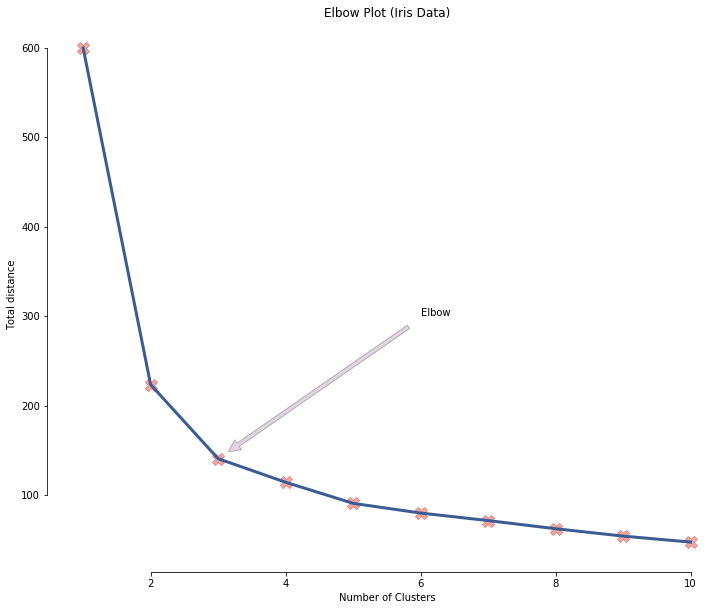

In [10]:
# Plot elbow method
fig, ax = plt.subplots(figsize=(12, 10))

# Draw points and connect them
ax.scatter(n_clusters, distances, s=150, 
           c=sns.xkcd_rgb['pale red'], marker='X', alpha=0.5)
ax.plot(n_clusters, distances, lw=3, linestyle='-', 
        color=sns.xkcd_rgb['denim blue'])

# Define elbow at three clusters
elb = (n_clusters[2], distances[2])

# Draw an arrow showing the elbow
ax.annotate('Elbow', xytext=[6, 300], xy=elb,
                arrowprops=dict(facecolor=sns.xkcd_rgb['dusty purple'], 
                                alpha=0.25, shrink=0.05))

# Decorate Plot
ax.set(title='Elbow Plot (Iris Data)', 
       xlabel='Number of Clusters', 
       ylabel='Total distance')
sns.despine(offset=5, trim=True)

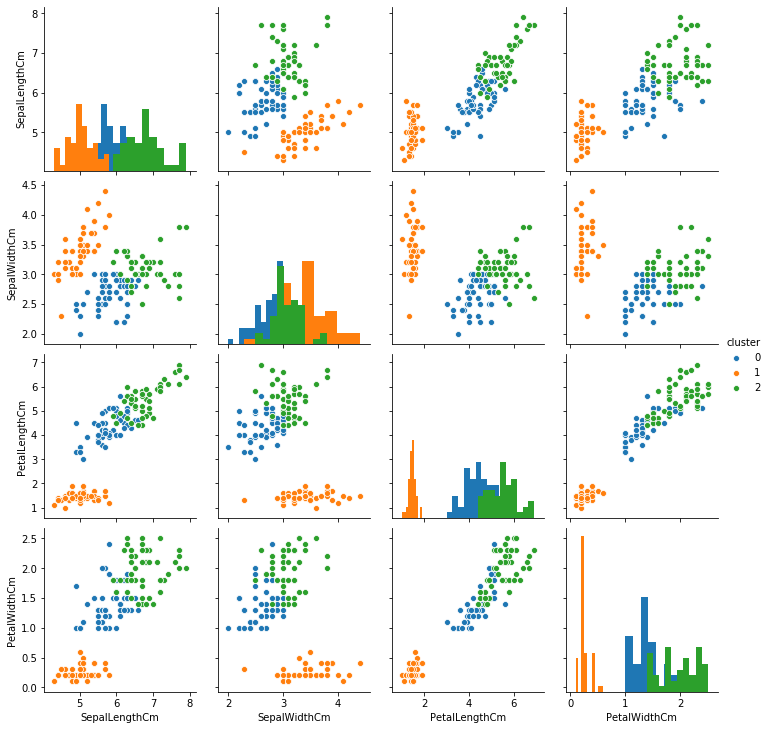

In [11]:
df['cluster'] = y_cluster
grid = sns.pairplot( df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'cluster']], hue="cluster", diag_kind='hist')

In [12]:
from sklearn import metrics
ars = metrics.adjusted_rand_score(y, y_cluster)
ss = metrics.silhouette_score(x, y_cluster)
print(f'Adjusted Rand Index:{ars:5.2f}')
print(f'Silhouette Score:{ss:5.2f}')

Adjusted Rand Index: 0.62
Silhouette Score: 0.46
